## Data Definition

**battery_power:** Total energy a battery can store in one time measured in mAh<br> 

**clock_speed:** Speed at which microprocessor executes instructions<br>

**fc:** Front Camera mega pixels<br>

**int_memory:** Internal Memory in Gigabytes<br>

**m_dep:** Mobile Depth in cm<br>

**mobile_wt:** Weight of mobile phone<br>

**n_cores:** Number of cores of processor<br>

**pc:** Primary Camera mega pixels<br>

**px_height:** Pixel Resolution Height<br>

**px_width:** Pixel Resolution Width<br>

**ram:** Random Access Memory in Mega Bytes<br>

**sc_h:** Screen Height of mobile in cm<br>

**sc_w:** Screen Width of mobile in cm<br>

**talk_time:** longest time that a single battery charge will last when you are<br>

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

In [6]:
plt.rcParams['figure.figsize'] = [15,8]

In [7]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

np.set_printoptions(suppress=True)

In [8]:
df_mobile = pd.read_csv('Mobile_data.csv')

df_mobile.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


#### Lets take a glance at our dataframe and see how it looks

In [9]:
df_mobile.shape

(2000, 15)

# <a id='data_preparation'></a>
# Data Analysis and Preparation

**1. Check for the data type**

In [10]:
df_mobile.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above output, it is clear that the data type of all the variables except 'clock_speed' and 'm_dep' is int64. The data type of 'clock_speed' and 'm_dep' is float64.<br><br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




In [11]:
df_mobile.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [12]:

df_features = df_mobile.iloc[:, df_mobile.columns != 'price_range']

df_target = df_mobile.iloc[:, df_mobile.columns == 'price_range']

Using the dataframe containing features (df_features) for further analysis.

<a id='Summary_Statistics'></a>
###  Summary Statistics

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In our dataset, we have both numerical and categorical variables. Now we check for summary statistics of all the variables.<br><br>
                        1. For numerical variables, use the describe()<br>
                        2. For categorical variables, use the describe(include=object) 
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df_features.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output illustrates the summary statistics of all the numeric variables namely mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.<br>
For example, the average battery life of the mobile phones is around 1238 mAh<br><br>
It can be seen that the variables have count equal to the number of observations. This means that there are no missing values in any of the column.</b>  
                    </font>
            </div>
        </td>
    </tr>
</table>

#### Distribution of numeric independent variables.

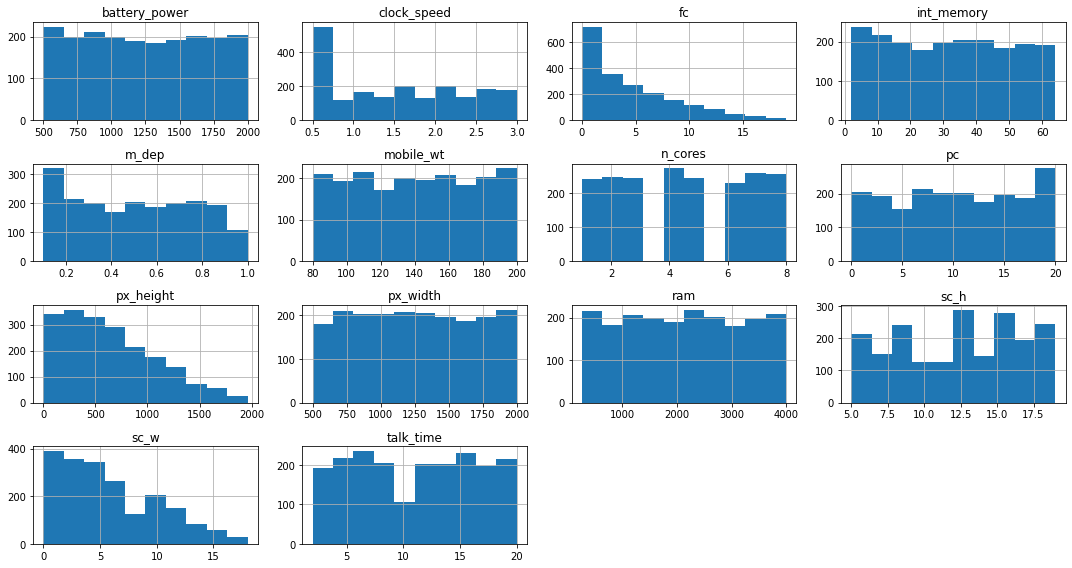

In [14]:
df_features.hist()

plt.tight_layout()

plt.show()  

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> It can be seen that the variables 'fc', 'px_height', and 'sc_w' are right-skewed.<br> <br> 
                        Other variables show no particular pattern of distribution.  
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Distribution of dependent variable.

In [15]:
class_frequency = df_target.price_range.value_counts()
class_frequency

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are equal observations in each class thus we see that there is a perfect balance between the four classes of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Group the dataframe by the price range

#### Generally, customers mainly look for ram while purchasing mobile. So, lets see what is the relation between ram and price_range

In [16]:
price_group = df_mobile.groupby('price_range')

In [17]:
# find the average ram in each price group
price_group['ram'].mean()

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

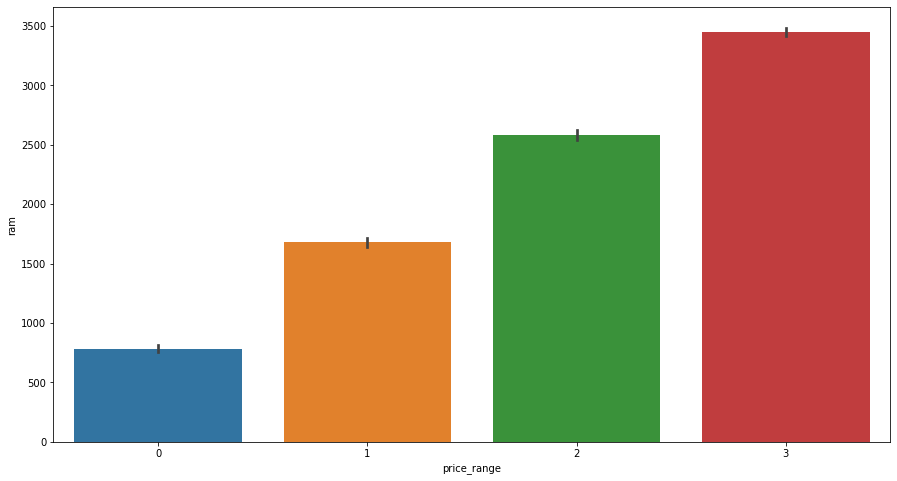

In [18]:
# create a barplot for price_range and ram
sns.barplot('price_range', 'ram', data=df_mobile)

**Interpretation:** The price of the mobile increases as the ram increases.

** Ploting the boxplot for numeric data**

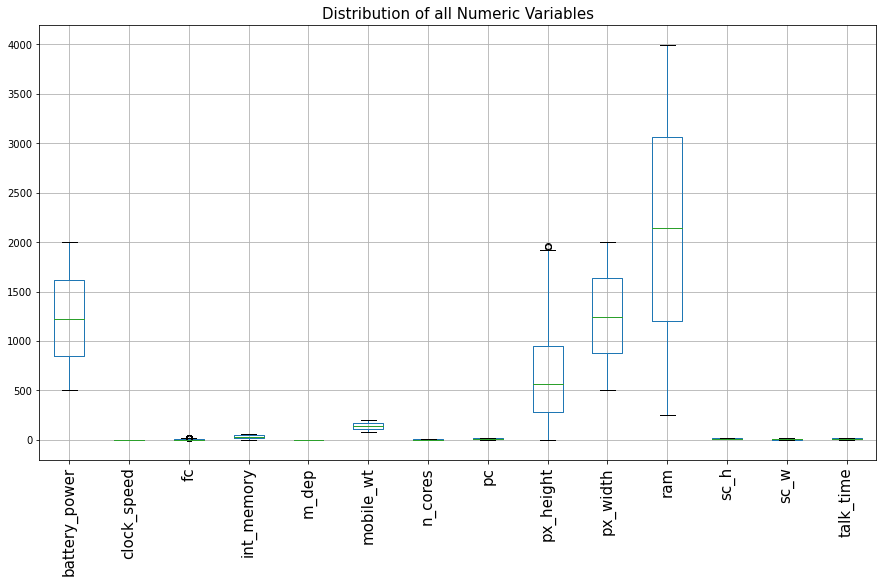

In [19]:
df_features.boxplot()

plt.title('Distribution of all Numeric Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

#### Some boxplots of variables are not seen because of the extreme values im other variables. So let's plot a separate boxplot for these variables

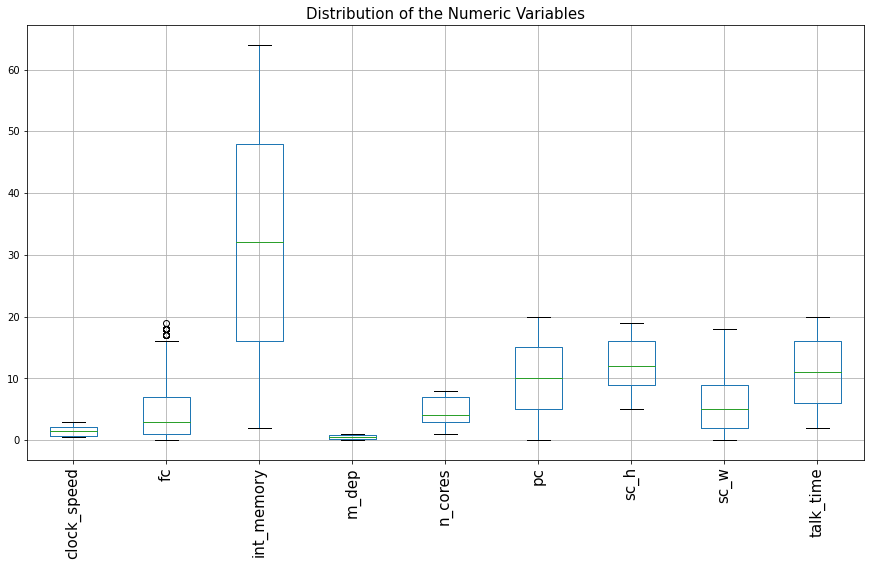

In [20]:
df_features.drop(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], axis = 1).boxplot()

plt.title('Distribution of the Numeric Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

**We can see that only 'fc' and 'px_height' have a few outliers. But they are not visible clearly. So we will plot separate boxplots for these two. Otherwise all the other variables do not have any outliers**

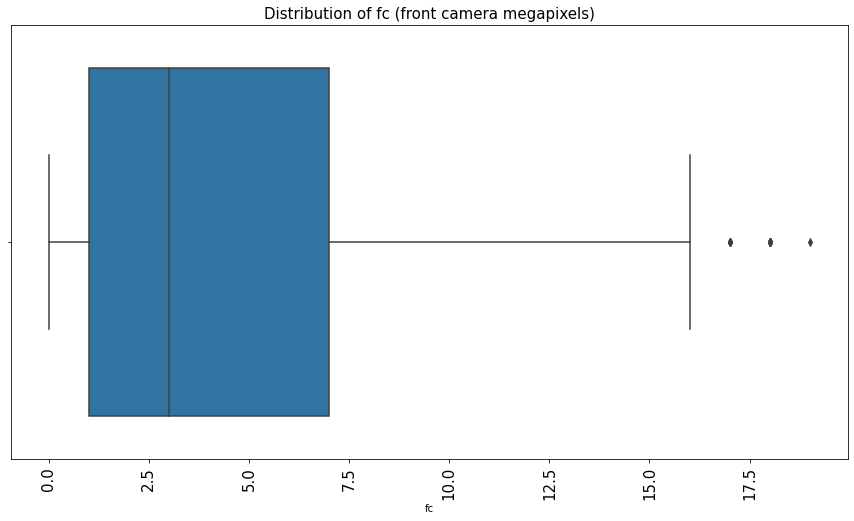

In [21]:
sns.boxplot(df_features['fc'])

plt.title('Distribution of fc (front camera megapixels)', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

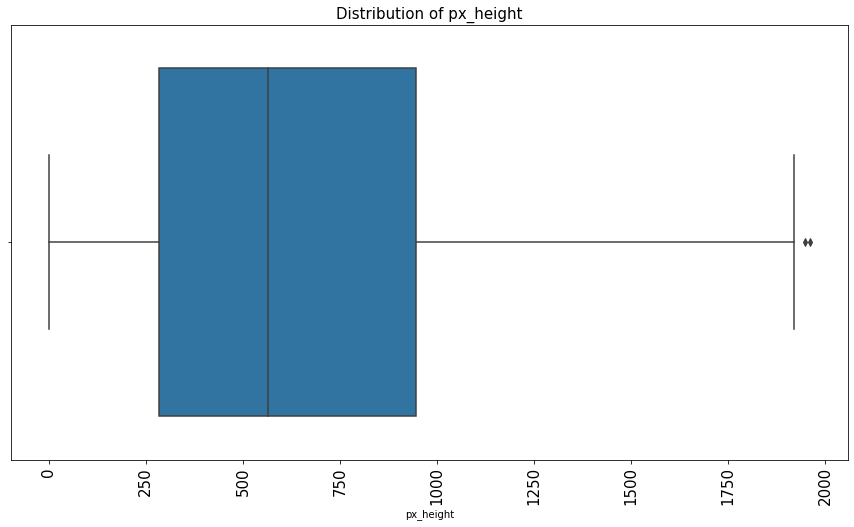

In [22]:
sns.boxplot(df_features['px_height'])

plt.title('Distribution of px_height', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

** Removing outliers by IQR method**




In [23]:
Q1 = df_features.quantile(0.25)

Q3 = df_features.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

battery_power     763.50
clock_speed         1.50
fc                  6.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
dtype: float64


In [24]:

df_mobile = df_mobile[~((df_mobile < (Q1 - 1.5 * IQR)) | (df_mobile > (Q3 + 1.5 * IQR))).any(axis=1)]

df_mobile = df_mobile.reset_index(drop = True)

To confirm that the outliers have been removed; let us visualize the boxplot again.

We plot the boxplots for all variables except for the variable `white corpuscle` for better visualization.

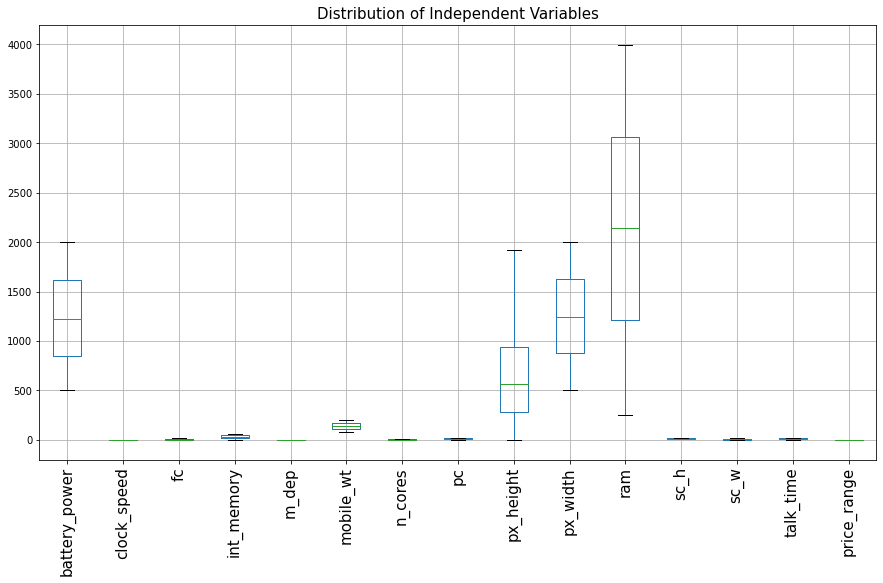

In [25]:
df_mobile.boxplot()

plt.title('Distribution of Independent Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data.

In [26]:
df_mobile.shape

(1980, 15)

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The output shows a reduction in the number of rows. Thus we may say that the potential outliers have been removed.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:

Total = df_mobile.isnull().sum().sort_values(ascending = False)          


Percent = (df_mobile.isnull().sum()*100/df_mobile.isnull().count()).sort_values(ascending = False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
battery_power,0,0.0
clock_speed,0,0.0
fc,0,0.0
int_memory,0,0.0
m_dep,0,0.0
mobile_wt,0,0.0
n_cores,0,0.0
pc,0,0.0
px_height,0,0.0
px_width,0,0.0


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are no missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

We plot a heatmap for visualization of missing values.

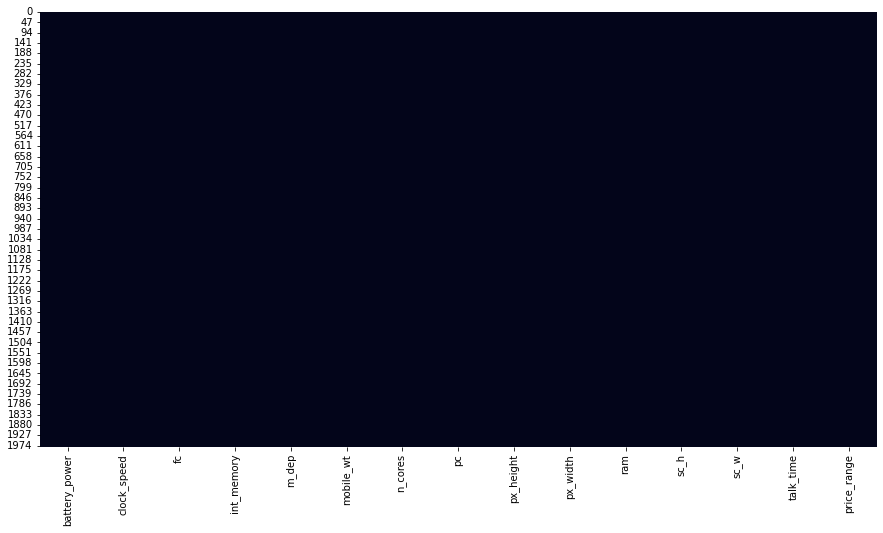

In [28]:
sns.heatmap(df_mobile.isnull(), cbar=False)

plt.show()

The horizontal lines in the heatmap correspond to the missing values. But there are no such line. This means there are no missing values.

In [29]:
y = df_mobile.price_range

df_mobile = df_mobile.drop('price_range', axis = 1)

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [30]:
df_num = df_mobile.apply(lambda rec: (rec - rec.mean()) / rec.std())

df_num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215


In [31]:
X = df_num.copy()

In [32]:
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215


In [33]:
def get_test_report(model):

    test_pred = model.predict(X_test)

    return(classification_report(y_test, test_pred))

#### Define a function to plot the confusion matrix.

In [34]:
def plot_confusion_matrix(model):
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1', 'Predicted:2','Predicted:3'],\
                               index = ['Actual:0','Actual:1', 'Actual:2','Actual:3'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

<a id="knn"></a>
#  K Nearest Neighbors (KNN)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

print("X_train",X_train.shape)
print("y_train",y_train.shape)

print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1386, 14)
y_train (1386,)
X_test (594, 14)
y_test (594,)


In [36]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

knn_model = knn_classification.fit(X_train, y_train)

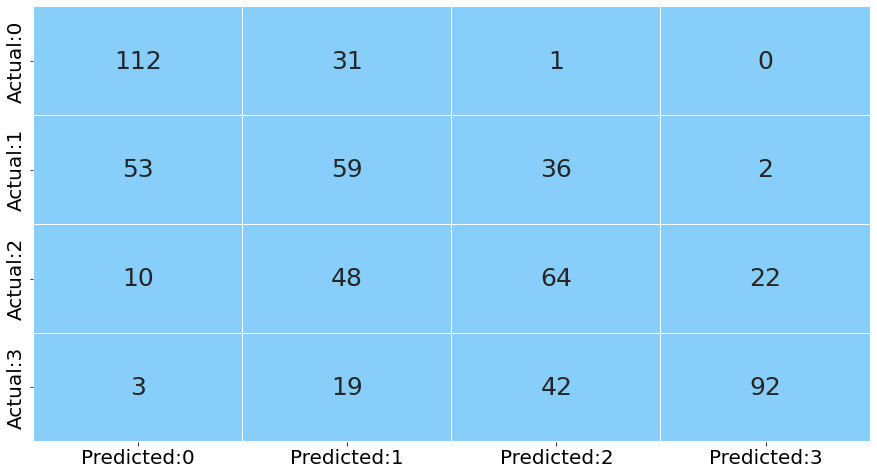

In [37]:
plot_confusion_matrix(knn_model)

In [38]:
test_report = get_test_report(knn_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       144
           1       0.38      0.39      0.38       150
           2       0.45      0.44      0.45       144
           3       0.79      0.59      0.68       156

    accuracy                           0.55       594
   macro avg       0.56      0.55      0.55       594
weighted avg       0.56      0.55      0.55       594



**Interpretation:** The accuracy is 55% for this model.

<a id="hyper"></a>
##  Optimal Value of K (using GridSearchCV)

In [39]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

knn_grid.fit(X_train, y_train)

print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 21} 



In [40]:
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       144
           1       0.64      0.60      0.62       150
           2       0.59      0.67      0.62       144
           3       0.87      0.71      0.78       156

    accuracy                           0.71       594
   macro avg       0.72      0.71      0.71       594
weighted avg       0.72      0.71      0.71       594



**Interpretation:** The accuracy is 71% for this model.

**Kappa score for knn_model**

In [41]:
y_pred = knn_model.predict(X_test)

In [42]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.40144018477842447


**Interpretation:** As, the kappa score for the KNN model is 0.4014, we can say that there is fair agrrement between the actual and predicted values.

**Kappa score tuned KNN model i.e. knn_grid**

In [43]:
y_pred = knn_grid.predict(X_test)

In [44]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.6121164081078021


**Interpretation:** As, the kappa score for the tuned KNN model is 0.6121, we can say that there is substantial agrrement between the actual and predicted values. The tuned knn model with k=21 is better than the knn model with k=3.